In [1]:
import json as js


In [2]:
import os
import re

import pandas as pd

from process import *
from tokamak_helpers import *

In [3]:
iter_re = re.compile("converged after (\d+) iterations")

def get_iterations(files):
    iters = []
    for f in files:
        md = get_metadata(f.name)
        with open(f.path, "r") as file:
            for line in file:
                match = iter_re.search(line)
                if match:
                    iters.append(dict(**md, iter=int(match.group(1))))
    return iters


In [21]:
db = Database([f.path for f in os.scandir("tmp-v100") if ".json" in f.name])

In [22]:
df = db.get_df("cg solver apply")
df

,node,average,count,max,min,total,variance,solver,min_l,max_l,agg
0,Ginkgo CG Solver Apply,0.012360,20.0,0.247121,3.814697e-06,0.247199,2.900679e-03,ginkgo,0.0,6.0,True
1,Ginkgo CG Solver Apply,0.000075,20.0,0.001478,7.152557e-07,0.001496,1.035879e-07,ginkgo,0.0,6.0,True
2,Ginkgo CG Solver Apply,0.000074,20.0,0.001458,7.152557e-07,0.001475,1.008755e-07,ginkgo,0.0,6.0,True
3,Ginkgo CG Solver Apply,0.000077,20.0,0.001513,7.152557e-07,0.001531,1.086749e-07,ginkgo,0.0,6.0,True
4,Ginkgo CG Solver Apply,0.000076,20.0,0.001506,7.152557e-07,0.001523,1.076190e-07,ginkgo,0.0,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...
19,Ginkgo CG Solver Apply,0.038812,20.0,0.776187,1.668930e-06,0.776235,2.861700e-02,ginkgo,5.0,6.0,True
20,Ginkgo CG Solver Apply,0.036093,20.0,0.721815,1.668930e-06,0.721867,2.474810e-02,ginkgo,5.0,6.0,True
21,Ginkgo CG Solver Apply,0.034323,20.0,0.686426,1.668930e-06,0.686467,2.238097e-02,ginkgo,5.0,6.0,True
22,Ginkgo CG Solver Apply,0.032493,20.0,0.649826,1.192093e-06,0.649866,2.005787e-02,ginkgo,5.0,6.0,True


In [23]:
df.solver.unique()

array(['ginkgo'], dtype=object)

In [14]:
df = apply_filter(df)

In [15]:
lvl0 = df[(df.min_l == 3) & (df.solver == "ginkgo")]

<AxesSubplot:>

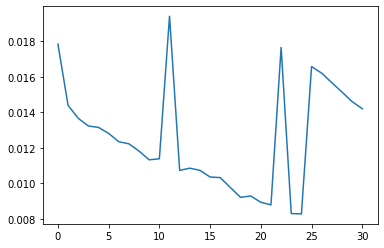

In [16]:
lvl0["max"].plot()


In [17]:
gko = df[(df.solver == "ginkgo")]
gko

,node,average,count,max,min,total,variance,solver,min_l,agg
0,Ginkgo CG Solver Apply,0.012360,20.0,0.247121,3.814697e-06,0.247199,2.900679e-03,ginkgo,0.0,True
1,Ginkgo CG Solver Apply,0.000075,20.0,0.001478,7.152557e-07,0.001496,1.035879e-07,ginkgo,0.0,True
2,Ginkgo CG Solver Apply,0.000074,20.0,0.001458,7.152557e-07,0.001475,1.008755e-07,ginkgo,0.0,True
3,Ginkgo CG Solver Apply,0.000077,20.0,0.001513,7.152557e-07,0.001531,1.086749e-07,ginkgo,0.0,True
4,Ginkgo CG Solver Apply,0.000076,20.0,0.001506,7.152557e-07,0.001523,1.076190e-07,ginkgo,0.0,True
...,...,...,...,...,...,...,...,...,...,...
19,Ginkgo CG Solver Apply,0.038812,20.0,0.776187,1.668930e-06,0.776235,2.861700e-02,ginkgo,5.0,True
20,Ginkgo CG Solver Apply,0.036093,20.0,0.721815,1.668930e-06,0.721867,2.474810e-02,ginkgo,5.0,True
21,Ginkgo CG Solver Apply,0.034323,20.0,0.686426,1.668930e-06,0.686467,2.238097e-02,ginkgo,5.0,True
22,Ginkgo CG Solver Apply,0.032493,20.0,0.649826,1.192093e-06,0.649866,2.005787e-02,ginkgo,5.0,True


<AxesSubplot:xlabel='index'>

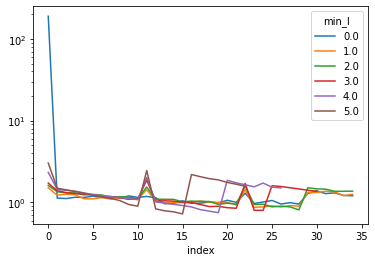

In [18]:
gko.reset_index().set_index(["min_l", "index"])["max"].unstack("min_l")\
    .drop(columns=[6]).apply(lambda s: s/ s.quantile(0.25)).plot(logy=True)

In [19]:
df.groupby(["min_l", "solver"]).sum()["max"].unstack("solver")

solver,ginkgo
min_l,
0.0,0.296582
1.0,0.081517
2.0,0.184860
3.0,0.389196
4.0,1.608096
5.0,13.852786
6.0,22.428670


In [4]:

before_json = [f.path for f in os.scandir("tokamak-mi100/") if "ginkgo" in f.name and ".json" in f.name]
before_db = Database(before_json)

In [ ]:
costs_before = ginkgo_non_solve_cost(before_db)
costs_before


In [7]:
json_g = [f.path for f in os.scandir("tokamak-pa-mi100/") if ".json" in f.name]
json_p = [f.path for f in os.scandir("tokamak-mi100/") if "petsc" in f.name and ".json" in f.name]

In [8]:
db = Database(json_g + json_p)

In [9]:
df = db.get_df("coarse grid solver")

In [10]:
costs = ginkgo_non_solve_cost(db)
costs

node,assembly,cg_apply,setup,total,rest
min_l,,,,,
0.0,0.000511,0.645631,0.092669,0.776804,0.037993
1.0,0.001106,0.950366,0.094445,1.085458,0.039542
2.0,0.005027,1.251847,0.092006,1.394212,0.045331
3.0,0.033261,1.329838,0.130315,1.559492,0.066078
4.0,0.245907,3.287023,0.245811,4.073962,0.295221
5.0,2.343615,14.820400,0.460540,21.057529,3.432974
6.0,28.947610,11.686851,2.285037,46.655706,3.736207


In [11]:
apply_rt = pd.concat([costs_before.cg_apply.rename("seq"),
                      costs.cg_apply.rename("par")], axis=1)
apply_rt

,seq,par
min_l,,
0,0.176719,0.645631
1,0.269747,0.950366
2,0.894550,1.251847
3,2.376047,1.329838
4,3.652877,3.287023
5,14.941199,14.820400
6,12.183814,11.686851


In [16]:
asm_rt = pd.concat([costs_before.assembly.rename("seq"),
                    costs.assembly.rename("par")], axis=1)
asm_rt

,seq,par
min_l,,
0,0.000972,0.000511
1,0.006511,0.001106
2,0.049381,0.005027
3,0.391872,0.033261
4,3.338706,0.245907
5,29.975894,2.343615
6,259.202071,28.947610


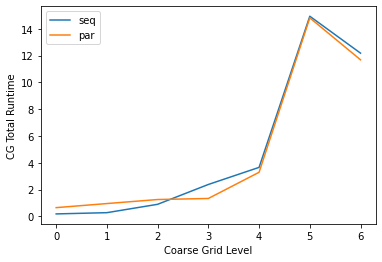

In [15]:
fig, ax = plt.subplots()
apply_rt.plot(ax=ax, legend=True)
ax.set_ylabel("CG Total Runtime")
ax.set_xlabel("Coarse Grid Level")
fig.savefig("cg_apply_runtime")


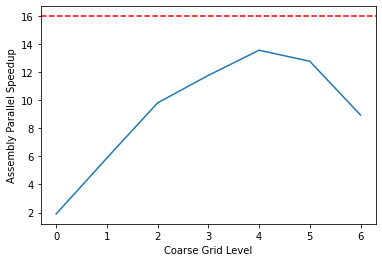

In [26]:
fig, ax = plt.subplots()
(asm_rt.seq / asm_rt.par).plot(ax=ax, legend=False)
ax.axhline(16, c="r", ls="--", label="Ideal")
ax.set_ylabel("Assembly Parallel Speedup")
ax.set_xlabel("Coarse Grid Level")
#ax.set_yscale("log")
fig.savefig("asm_speedup")
